<a href="https://colab.research.google.com/github/liamchalcroft/RectAngle/blob/main/colab_from_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! git clone https://49064dc98b2d46c3874378ed4375bf1b5938d905@github.com/liamchalcroft/RectAngle.git

In [2]:
# ! pip uninstall rectangle -y; cd RectAngle; git pull; pip install . -q

In [3]:
# ! python data.py

In [4]:
import rectangle as rect
import h5py
import matplotlib.pyplot as plt
import torch
from scipy.stats import linregress

In [5]:
f = h5py.File('dataset70-200.h5', 'r')

In [6]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  torch.backends.cudnn.benchmark = True
else:
  device = torch.device('cpu')

# model_ = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
# model_ = rect.model.networks.UNet(n_layers=5, device=device, gate=None)

In [7]:
train_ix, test_ix, _ = rect.utils.io.train_val_test(f, ratio=(0.8,0.2,0))

train_keys, test_keys = rect.utils.io.key_gen(f, train_ix), \
                        rect.utils.io.key_gen(f, test_ix)

train_data,  test_data = rect.utils.io.H5DataLoader(f, train_keys,'random'), \
                          rect.utils.io.H5DataLoader(f, test_keys, label='vote')

test_plot_data = rect.utils.io.TestPlotLoader(f, test_keys, label='vote')

#62: Mean Dice Loss: 0.2315768003463745
Epoch #63: Mean Dice Loss: 0.3113347887992859
Epoch #64: Mean Dice Loss: 0.24776309728622437
Epoch #65: Mean Dice Loss: 0.2413175106048584
Mean Validation Dice: 0.6260422468185425
Epoch #66: Mean Dice Loss: 0.22177135944366455
Epoch #67: Mean Dice Loss: 0.3426625728607178
Epoch #68: Mean Dice Loss: 0.2281816601753235
Epoch #69: Mean Dice Loss: 0.27791088819503784
Epoch #70: Mean Dice Loss: 0.2559735178947449
Mean Validation Dice: 0.6515403538942337
Epoch #71: Mean Dice Loss: 0.294164776802063
Epoch #72: Mean Dice Loss: 0.2607985734939575
Epoch #73: Mean Dice Loss: 0.23016196489334106
Epoch #74: Mean Dice Loss: 0.26524901390075684
Epoch #75: Mean Dice Loss: 0.27653878927230835
Mean Validation Dice: 0.632213369011879
Epoch #76: Mean Dice Loss: 0.2506622076034546
Epoch #77: Mean Dice Loss: 0.24277514219284058
Epoch #78: Mean Dice Loss: 0.2035169005393982
Epoch #79: Mean Dice Loss: 0.2002529501914978
Epoch #80: Mean Dice Loss: 0.25118571519851685
Mea

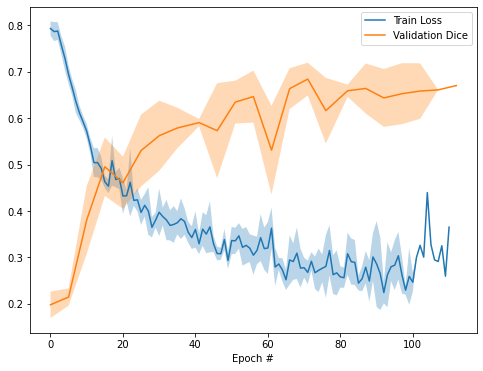

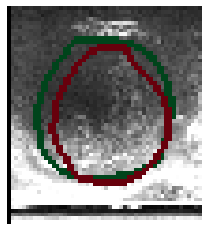

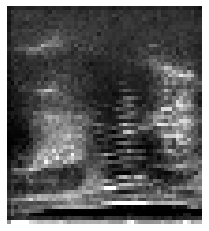

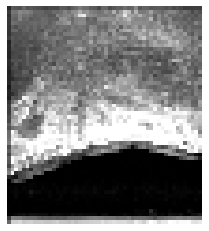

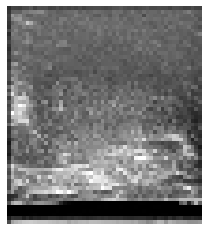

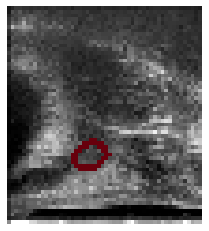

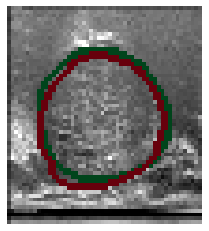

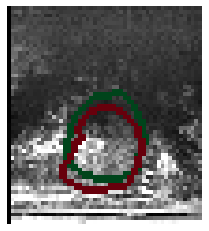

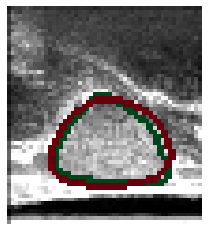

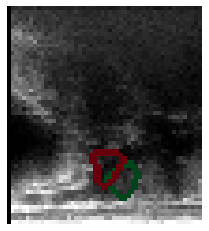

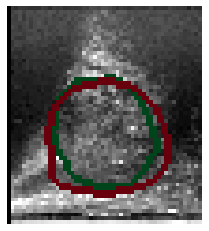

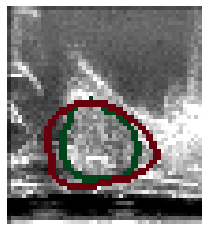

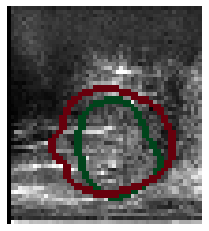

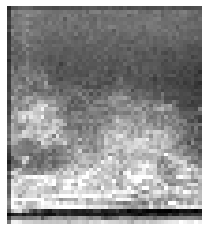

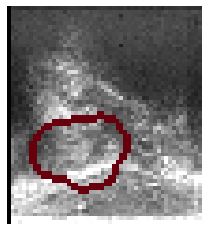

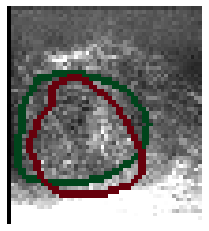

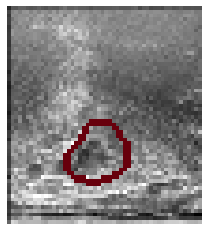

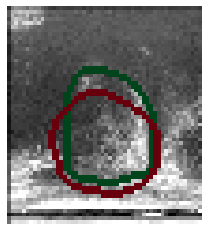

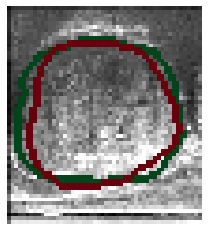

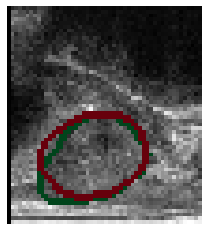

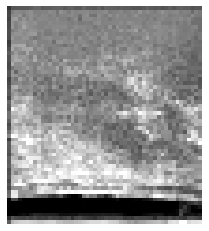

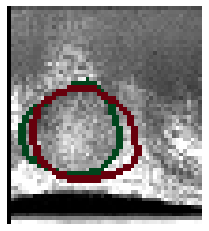

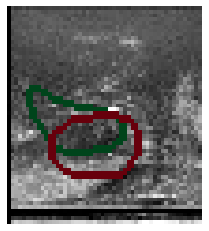

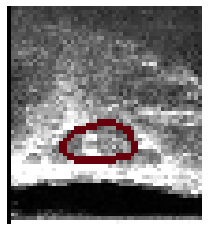

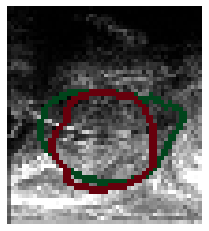

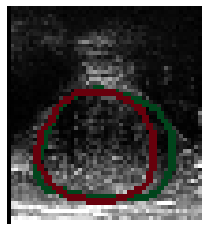

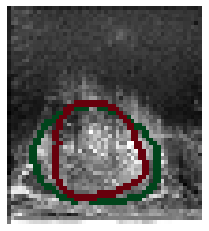

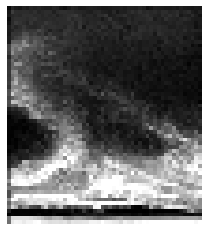

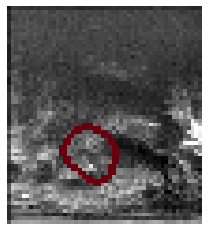

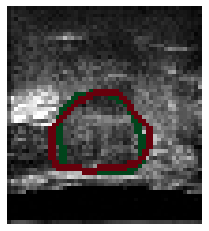

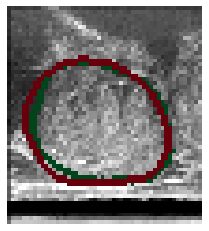

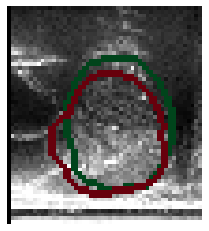

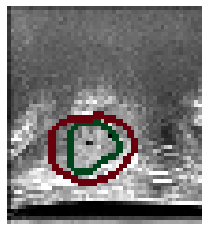

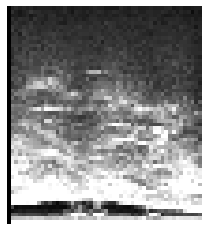

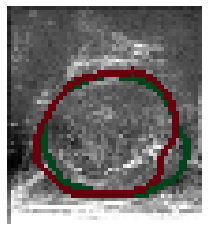

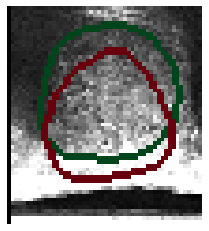

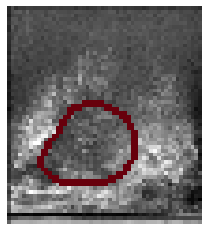

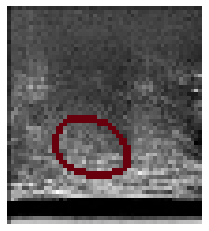

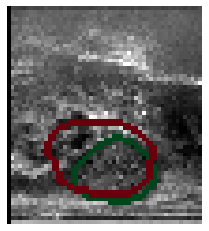

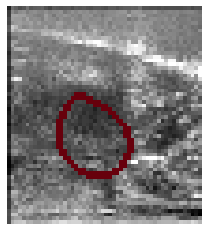

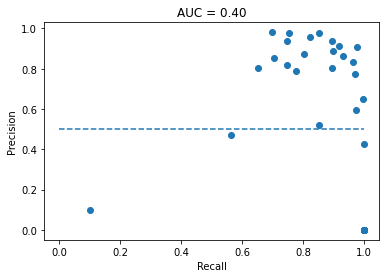

In [8]:
model_rand = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_rand = rect.utils.io.H5DataLoader(f, train_keys, label='random')
trainer_rand = rect.utils.train.Trainer(model_rand, ensemble=5, outdir='./random')
trainer_rand.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_rand.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
# trainer_rand.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
#              test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])

301
Mean Validation Dice: 0.20217230916023254
Epoch #6: Mean Dice Loss: 0.7160311937332153
Epoch #7: Mean Dice Loss: 0.6391197443008423
Epoch #8: Mean Dice Loss: 0.574849545955658
Epoch #9: Mean Dice Loss: 0.5625903606414795
Epoch #10: Mean Dice Loss: 0.5963948965072632
Mean Validation Dice: 0.38545142114162445
Epoch #11: Mean Dice Loss: 0.550012469291687
Epoch #12: Mean Dice Loss: 0.49197906255722046
Epoch #13: Mean Dice Loss: 0.5064735412597656
Epoch #14: Mean Dice Loss: 0.48845791816711426
Epoch #15: Mean Dice Loss: 0.5186811685562134
Mean Validation Dice: 0.3872567415237427
Epoch #16: Mean Dice Loss: 0.4925388693809509
Epoch #17: Mean Dice Loss: 0.5271892547607422
Epoch #18: Mean Dice Loss: 0.4940795302391052
Epoch #19: Mean Dice Loss: 0.5245686769485474
Epoch #20: Mean Dice Loss: 0.4715830683708191
Mean Validation Dice: 0.3751959949731827
Epoch #21: Mean Dice Loss: 0.4751710295677185
Epoch #22: Mean Dice Loss: 0.4517432451248169
Epoch #23: Mean Dice Loss: 0.4729635715484619
Epoch 

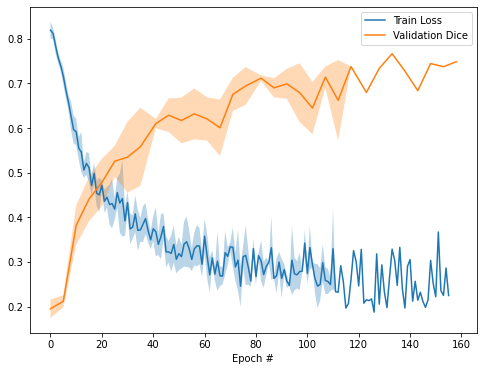

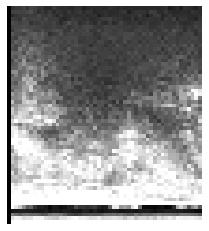

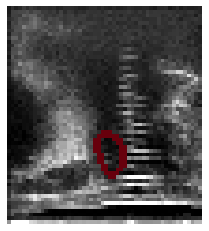

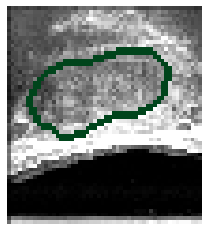

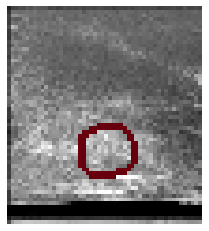

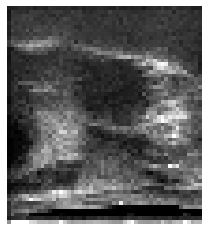

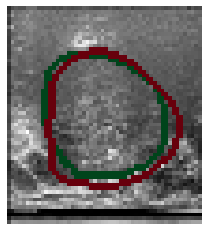

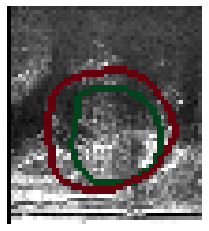

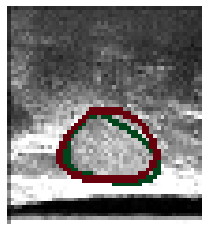

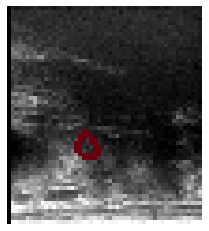

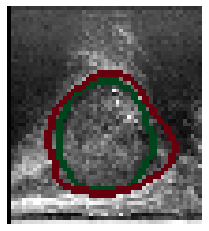

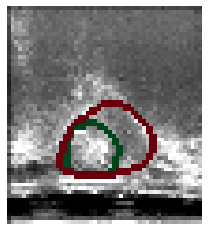

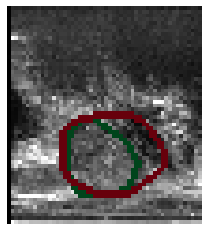

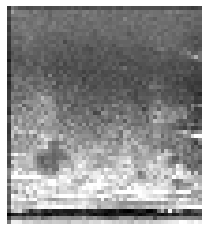

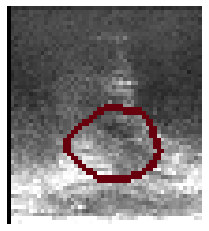

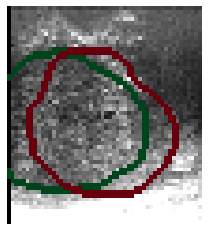

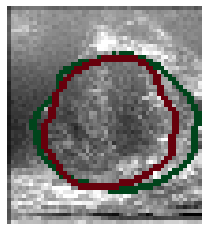

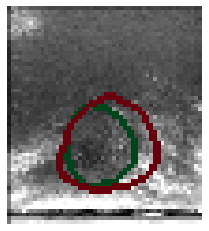

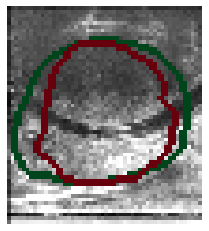

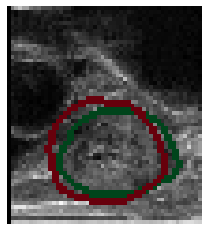

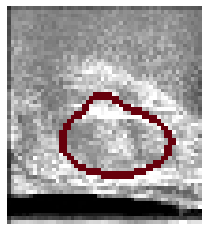

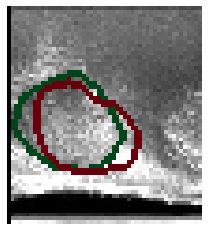

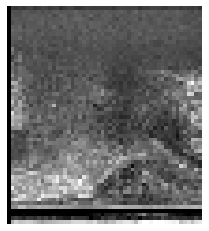

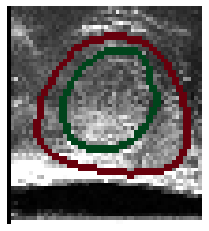

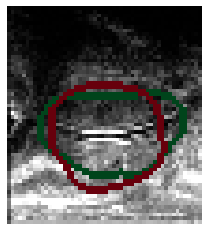

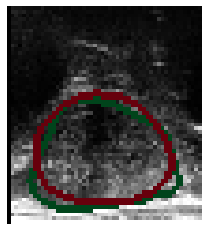

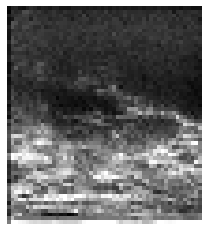

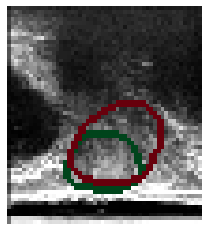

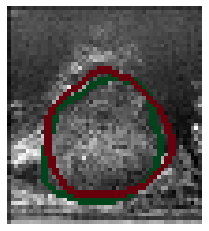

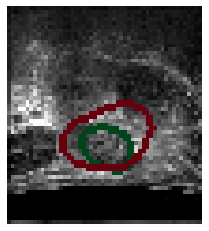

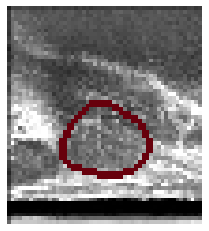

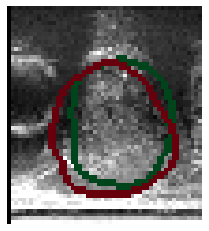

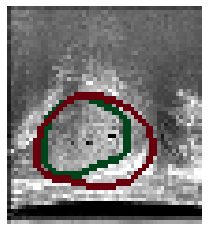

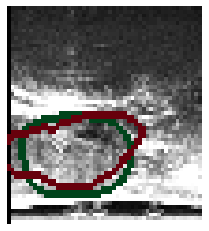

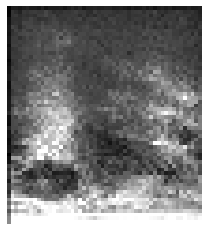

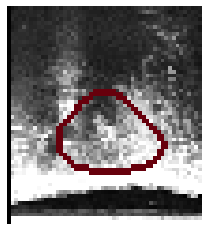

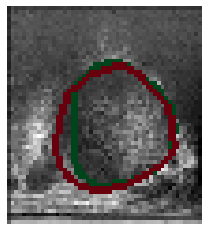

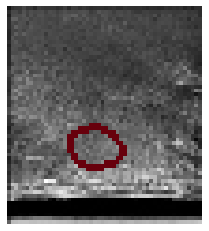

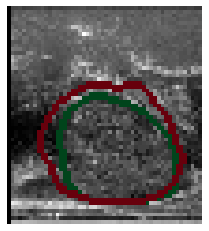

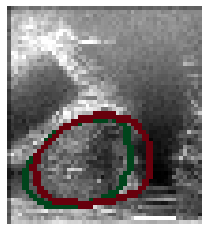

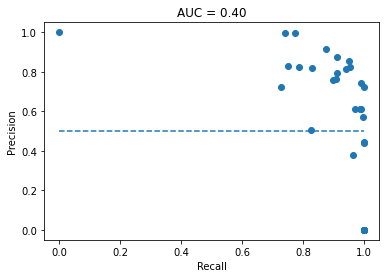

In [9]:
model_vote = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_vote = rect.utils.io.H5DataLoader(f, train_keys, label='vote')
trainer_vote = rect.utils.train.Trainer(model_vote, ensemble=5, outdir='./vote')
trainer_vote.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_vote.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
# trainer_vote.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
#              test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])

Loss: 0.36573559045791626
Mean Validation Dice: 0.5564322620630264
Epoch #31: Mean Dice Loss: 0.3848421573638916
Epoch #32: Mean Dice Loss: 0.380138099193573
Epoch #33: Mean Dice Loss: 0.3906508684158325
Epoch #34: Mean Dice Loss: 0.40105968713760376
Epoch #35: Mean Dice Loss: 0.32601290941238403
Mean Validation Dice: 0.5754480063915253
Epoch #36: Mean Dice Loss: 0.3917556405067444
Epoch #37: Mean Dice Loss: 0.34704381227493286
Epoch #38: Mean Dice Loss: 0.38113856315612793
Epoch #39: Mean Dice Loss: 0.39098089933395386
Epoch #40: Mean Dice Loss: 0.405160129070282
Mean Validation Dice: 0.5557397603988647
Epoch #41: Mean Dice Loss: 0.4275694489479065
Epoch #42: Mean Dice Loss: 0.36302775144577026
Epoch #43: Mean Dice Loss: 0.3027162551879883
Epoch #44: Mean Dice Loss: 0.37053126096725464
Epoch #45: Mean Dice Loss: 0.33483946323394775
Mean Validation Dice: 0.6086655408143997
Epoch #46: Mean Dice Loss: 0.3754904866218567
Epoch #47: Mean Dice Loss: 0.2948892116546631
Epoch #48: Mean Dice L

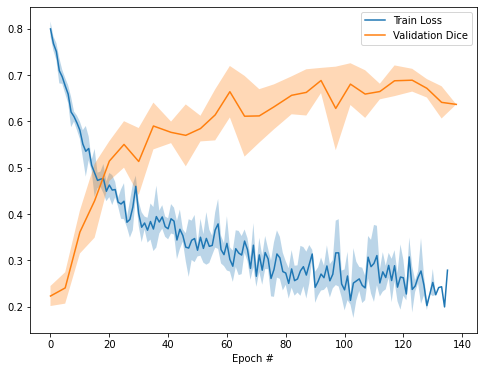

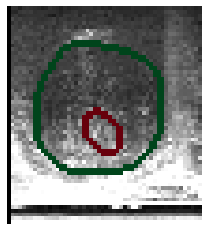

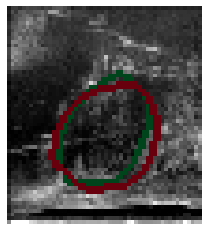

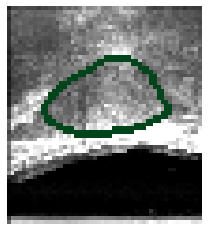

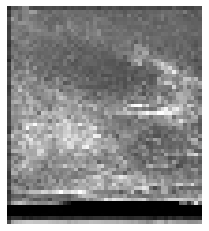

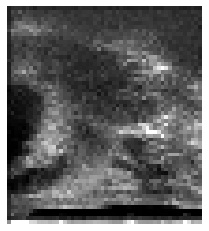

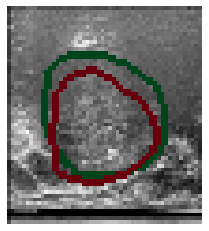

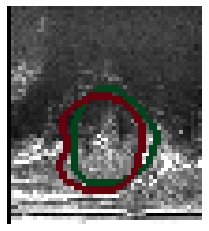

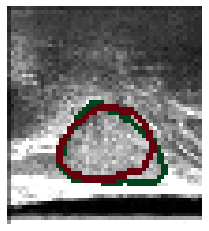

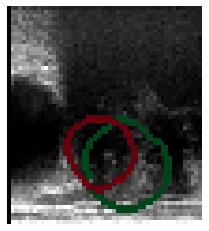

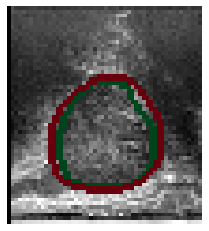

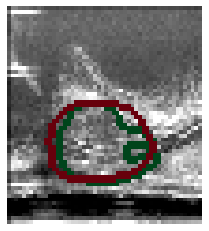

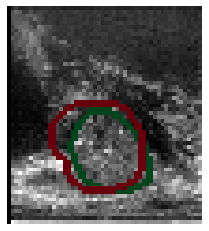

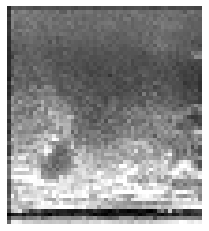

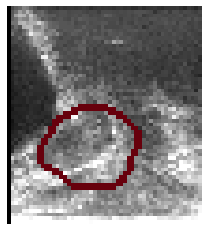

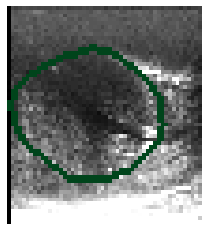

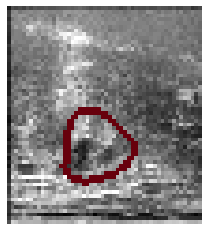

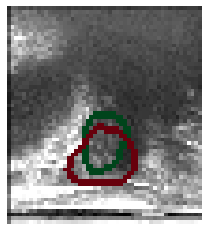

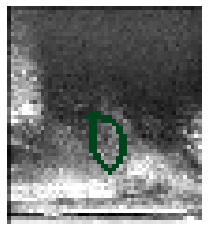

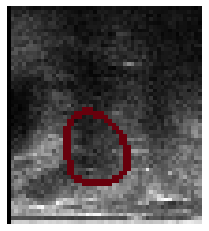

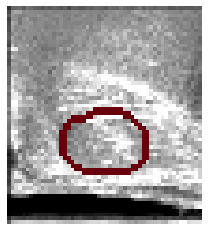

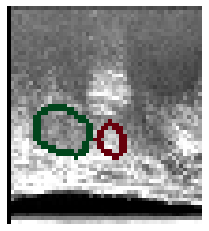

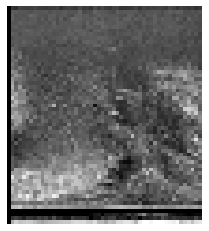

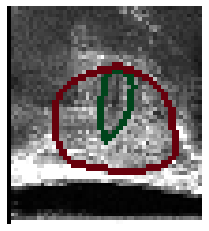

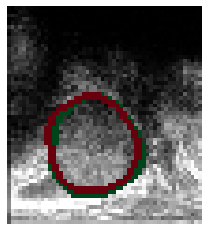

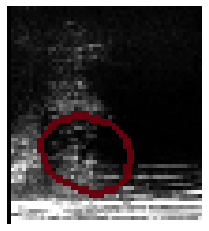

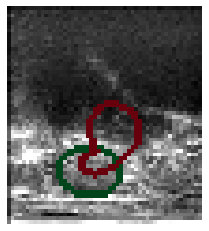

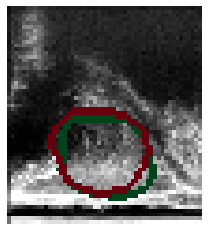

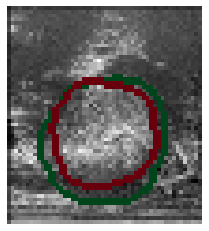

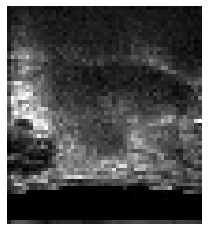

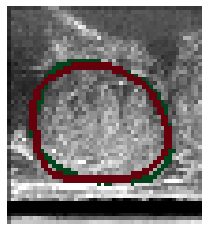

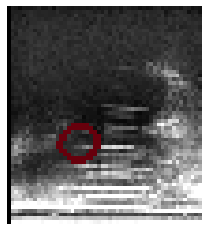

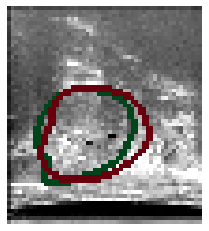

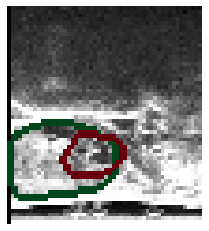

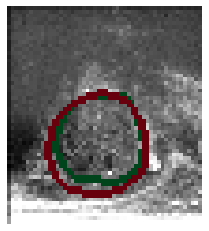

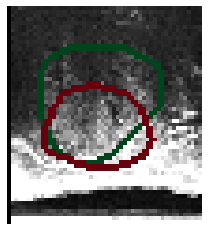

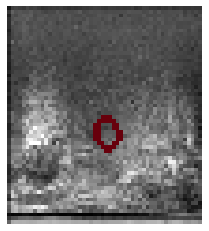

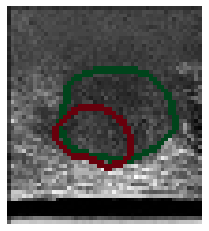

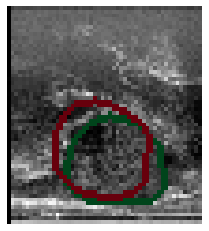

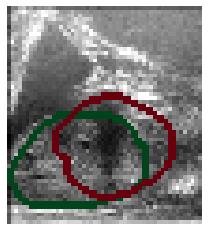

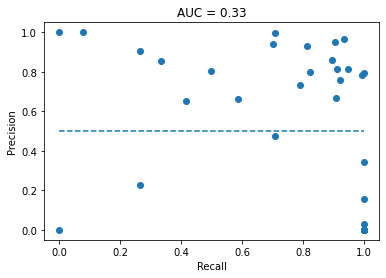

In [10]:
model_mean = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_mean = rect.utils.io.H5DataLoader(f, train_keys, label='mean')
trainer_mean = rect.utils.train.Trainer(model_mean, ensemble=5, outdir='./mean')
trainer_mean.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_mean.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
# trainer_mean.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
#              test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()], oname='test')

In [11]:
import numpy as np

rand_dice = np.genfromtxt('./random/testing/table/dice_Apr-08-2021.csv', delimiter=',')
rand_prec = np.genfromtxt('./random/testing/table/precision_Apr-08-2021.csv', delimiter=',')
rand_rec = np.genfromtxt('./random/testing/table/recall_Apr-08-2021.csv', delimiter=',')

vote_dice = np.genfromtxt('./vote/testing/table/dice_Apr-08-2021.csv', delimiter=',')
vote_prec = np.genfromtxt('./vote/testing/table/precision_Apr-08-2021.csv', delimiter=',')
vote_rec = np.genfromtxt('./vote/testing/table/recall_Apr-08-2021.csv', delimiter=',')

mean_dice = np.genfromtxt('./mean/testing/table/dice_Apr-08-2021.csv', delimiter=',')
mean_prec = np.genfromtxt('./mean/testing/table/precision_Apr-08-2021.csv', delimiter=',')
mean_rec = np.genfromtxt('./mean/testing/table/recall_Apr-08-2021.csv', delimiter=',')

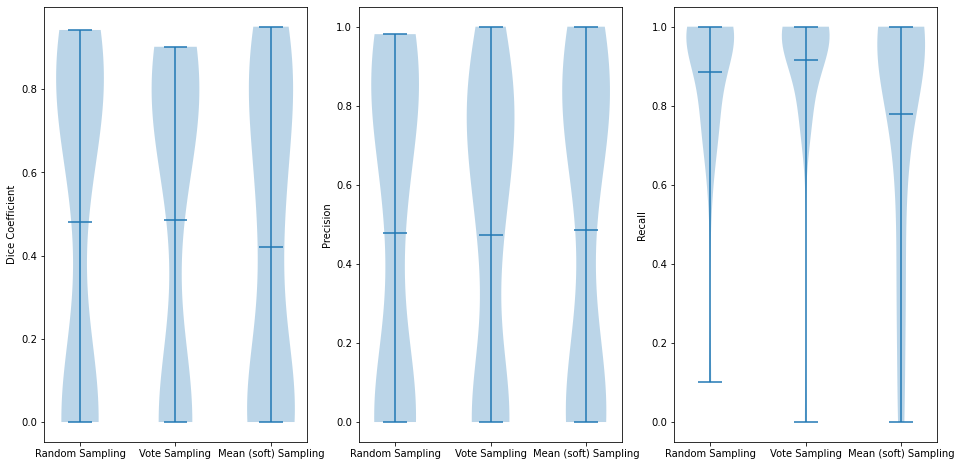

In [12]:
# create violin plots of dice scores

plt.figure(figsize=(16,8))

plt.subplot(131)
plt.violinplot([rand_dice, vote_dice, mean_dice], showmeans=True)
plt.ylabel('Dice Coefficient')
plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

plt.subplot(132)
plt.violinplot([rand_prec, vote_prec, mean_prec], showmeans=True)
plt.ylabel('Precision')
plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

plt.subplot(133)
plt.violinplot([rand_rec, vote_rec, mean_rec], showmeans=True)
plt.ylabel('Recall')
plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

plt.show()

In [13]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    fit = linregress(mean, diff)
    rsq = fit.rvalue**2
    x = np.linspace(mean.min(), mean.max())
    y = fit.slope * x + fit.intercept

    plt.scatter(mean, diff, *args, **kwargs)
    plt.plot(x, y, '--', c='r')
    plt.text(x[-1], y[-1], '$R^2$ = {:.3f}'.format(rsq), c='r')
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

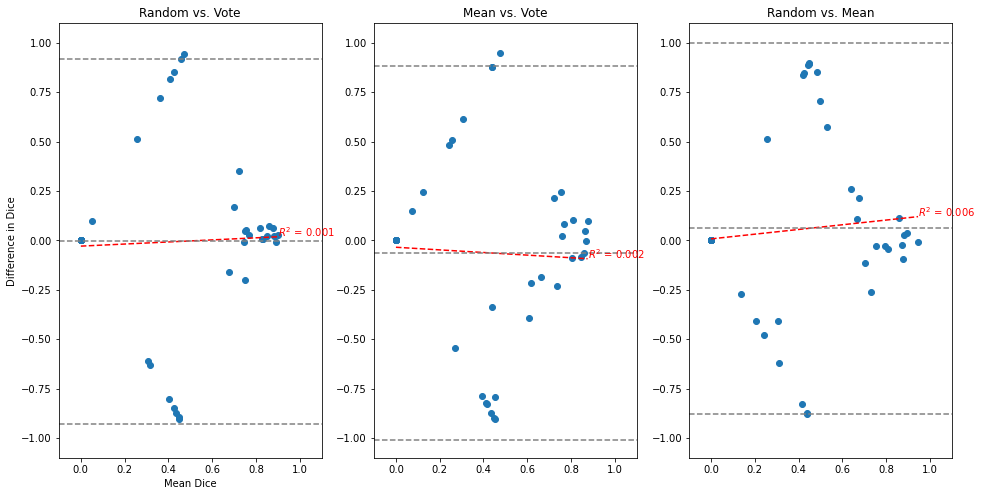

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(131)
bland_altman_plot(rand_dice, vote_dice)
plt.ylim([-1.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.xlabel('Mean Dice')
plt.ylabel('Difference in Dice')
plt.title('Random vs. Vote')
plt.subplot(132)
bland_altman_plot(mean_dice, vote_dice)
plt.ylim([-1.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.title('Mean vs. Vote')
plt.subplot(133)
bland_altman_plot(rand_dice, mean_dice)
plt.ylim([-1.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.title('Random vs. Mean')
plt.show()

In [15]:
class_train_ix, class_val_ix, _ = rect.utils.io.train_val_test(f, ratio=(0.6,0.2,0.2))

class_train_keys, class_val_keys = rect.utils.io.key_gen(f, class_train_ix), rect.utils.io.key_gen(f, class_val_ix)

class_train_data, class_val_data = rect.utils.io.ClassifyDataLoader(f, class_train_keys), rect.utils.io.ClassifyDataLoader(f, class_val_keys)

In [16]:
class_train_data = rect.utils.io.ClassifyDataLoader(f, class_train_keys)

In [17]:
class_model = rect.model.networks.MakeDenseNet(freeze_weights=False).to(device)

In [18]:
class_trainer = rect.utils.train.ClassTrainer(class_model, outdir='./classlogs',
                                         ensemble=None, early_stop=1000)

Epoch #0: Mean acc Loss: 0.6564643979072571
Mean Validation acc: 0.7928571428571429
Epoch #1: Mean acc Loss: 1.5955313444137573
Epoch #2: Mean acc Loss: 0.45983415842056274
Epoch #3: Mean acc Loss: 0.5589630603790283
Epoch #4: Mean acc Loss: 0.5429883599281311
Epoch #5: Mean acc Loss: 0.5628204345703125
Mean Validation acc: 0.8142857142857143
Epoch #6: Mean acc Loss: 0.671958863735199
Epoch #7: Mean acc Loss: 0.4485607147216797
Epoch #8: Mean acc Loss: 0.36111336946487427
Epoch #9: Mean acc Loss: 0.582339346408844
Epoch #10: Mean acc Loss: 0.29338327050209045
Mean Validation acc: 0.3571428571428571
Epoch #11: Mean acc Loss: 0.42407557368278503
Epoch #12: Mean acc Loss: 0.28793466091156006
Epoch #13: Mean acc Loss: 0.2525825500488281
Epoch #14: Mean acc Loss: 0.37343063950538635
Epoch #15: Mean acc Loss: 0.26232150197029114
Mean Validation acc: 0.6142857142857142
Epoch #16: Mean acc Loss: 0.2736431658267975
Epoch #17: Mean acc Loss: 0.3270881772041321
Epoch #18: Mean acc Loss: 0.2578143

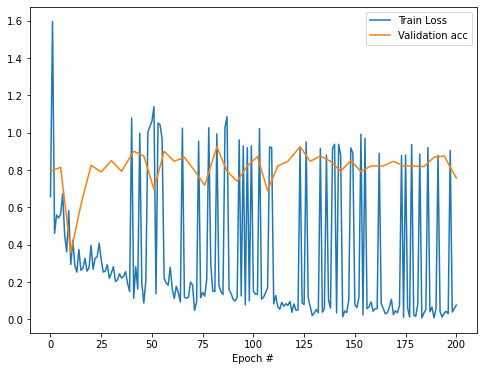

In [19]:
class_trainer.train(class_train_data, class_val_data)

In [20]:
for i in range(10):
    thresh = i/10
    print('Threshold = {}'.format(thresh))
    test_screen_data = rect.utils.io.PreScreenLoader(class_model, f, test_keys, label='vote', threshold = thresh)
    trainer_vote.test(test_screen_data, test_pre=[rect.utils.transforms.z_score()], 
                test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()], oname='class_thresh_{}'.format(i))

Threshold = 0.0


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1056, 1, 1])